In [1]:
# Code Refactory for R2T2 code
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from shapely import geometry

# 3D Plot
from mpl_toolkits import mplot3d

# Custom Classes
from Dynamic import DynamicMap

In [2]:
# Test case
# Initial, Final Positions
x0 = np.array([0, 0, 0])
x1 = np.array([10, 0, 0])
t = [50, .1, 100]

# Vehicle Spec
vehicle = {}
vehicle['v'] = 1
vehicle['radius'] = 0.5
vehicle['w'] = np.deg2rad(30)

# Map
map_in = {}
# Static Map
map_in['st'] = {}
map_in['st']['size'] = np.array([-5, 15, -15, 15])
# Single buliding example
map_in['st']['n'] = 1
map_in['st']['0'] = np.array([
    (2.5,5), (7.5,5), (7.5,-5), (2.5,-5)
])

# Dynamic Map
# This is a continuous function generates camera FOV coverages
# Input is map_in, and time input t_in
map_in['n'] = t[0]
map_in['ncam'] = 1

# Single camera example, surveying final location xfin
# Camera Position
cam_x = np.array([7.5])
cam_y = np.array([0])
cam_dict = {}
cam_dict['n'] = len(cam_x)
cam_dict['x'] = cam_x
cam_dict['y'] = cam_y

# Camera Spec
tilt_limit = np.array([np.pi, 0]) #[upper, lower]
fov_ang = np.deg2rad(20)
fov_rng = 7.5 #[m]
cam_period = t[0]
cam_increment = t[1]
cam_dict['spec'] = {}
cam_dict['spec']['bound'] = tilt_limit
cam_dict['spec']['fov'] = [fov_ang, fov_rng]
cam_dict['spec']['cam_time'] = [cam_period, cam_increment]

# Test dynamic map
dmap = DynamicMap(map_in, cam_dict)
map_in['dy'] = dmap

In [17]:
def inside_map(x, y, t, map_in):
    return map_in['st']['size'][0] <= x <= map_in['st']['size'][1] and map_in['st']['size'][2] <= y <= map_in['st']['size'][3] and 0 <= t <= 50

In [22]:
def inside_building(x, y, t, map_in):
    check_vec = []
    for i in range(map_in['st']['n']):
        ibuilding = map_in['st'][str(i)]
        wall = geometry.LineString(ibuilding)
        building = geometry.Polygon(wall)

        check_vec.append(building.contains(geometry.Point(x, y)))
    return np.sum(check_vec)
    

In [5]:
def dynamic_bound(x, y, t, map_in):
    cameras = dmap.gen_cam(t)
    ncam = cameras['n']
    check_vec = []
    for i in range(ncam):
        cam_i = cameras[str(i)]['FOV_Poly']
        check_vec.append(cam_i.contains(geometry.Point(x, y)))
    return bool(np.sum(check_vec))

In [19]:
def isValid(x, y, t, map_in):
    # Check in map
    inMap = inside_map(x, y, t, map_in)

    # Check outside buildilng
    inBuilding = inside_building(x, y, t, map_in)

    # Check dyanmic bound
    outFOV = dynamic_bound(x, y, t, map_in)

    return inMap and not inBuilding and not outFOV

In [27]:
# Randomly sample x, y, t

V = []
E = []
V.append(x0)

K = 20
k = 0
while k < K:
    # Random Sample x, y, t
    x = rn.uniform(map_in['st']['size'][0], map_in['st']['size'][1])
    y = rn.uniform(map_in['st']['size'][2], map_in['st']['size'][3])
    t = rn.uniform(0.1, 50)

    if isValid(x, y, t, map_in):
        qnew = np.array([x, y, t])
        V.append(qnew)
        print(k)
        
        k += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


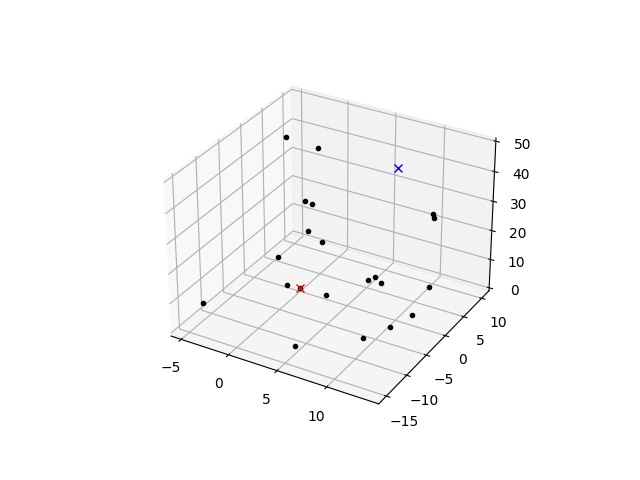

In [31]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

for v in V:
    ax.plot3D(v[0], v[1], v[2], '.k')

ax.plot3D(x0[0], x0[1], x0[2], 'xr')
ax.plot3D(x1[0], x1[1], 50, 'xb')